# Rural Development Education Analytical Model to solve all problems, find out best teachers and keep Rural Education happening sincerely and regularly

# Debadri Dutta


## Analyzing Problems and coming up with solution in a more precise, accurate and efficient way

### Importing the dataset from our MySQL database

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
feedback=pd.read_csv("ruraleducation.csv")

In [3]:
feedback.head()

,StudentID,timedate,Problem,Location,Zone,Description
0,1504469,14-02-2018 00:00,Teachers,Birbhum,Zone 1,Teacher is irregular
1,1504012,18-02-2018 00:00,Teachers,Birbhum,Zone 1,Teacher is irregular
2,1504469,18-02-2018 00:00,Teachers,Birbhum,Zone 1,Teacher is irregular
3,1507185,18-02-2018 00:00,Classrooms,Birbhum,Zone 1,Water leaking from rooftop
4,1504368,18-02-2018 00:00,Washrooms,Bankura,Zone 3,unclean washrooms


### We find out what are the major problems

In [4]:
feedback['Problem'].value_counts()

Teachers                5
Classrooms              3
Books                   1
Electricity or Water    1
Washrooms               1
Finance                 1
Name: Problem, dtype: int64

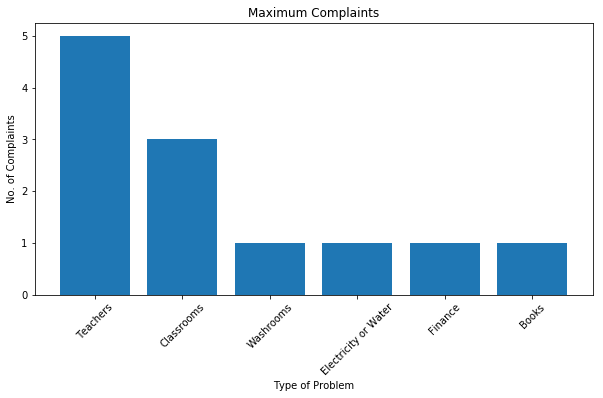

In [5]:
plt.figure(figsize=(10,5))
y=feedback['Problem'].value_counts()
yd=feedback['Problem'].unique()
p=feedback['Problem'].nunique()
d=np.linspace(1,p,p)
plt.bar(d,y,align='center')
plt.xticks(d,yd,rotation=45)
plt.xlabel('Type of Problem')
plt.ylabel('No. of Complaints')
plt.title('Maximum Complaints')
plt.rcParams.update({'font.size': 10})
plt.show()

In [6]:
feedback['Description']

0                            Teacher is irregular
1                            Teacher is irregular
2                            Teacher is irregular
3                      Water leaking from rooftop
4                               unclean washrooms
5                     fans and lights not working
6            Books very bad condition, unreadable
7                              Teacher not coming
8     Broken walls and water leaking from rooftop
9                     Teacher not coming everyday
10                                 Books very bad
11                       Too small, space problem
Name: Description, dtype: object

### Data Pre-Processing

In [7]:
feedback['timedate']=feedback['timedate'].str[:11]

In [8]:
feedback.head()

,StudentID,timedate,Problem,Location,Zone,Description
0,1504469,14-02-2018,Teachers,Birbhum,Zone 1,Teacher is irregular
1,1504012,18-02-2018,Teachers,Birbhum,Zone 1,Teacher is irregular
2,1504469,18-02-2018,Teachers,Birbhum,Zone 1,Teacher is irregular
3,1507185,18-02-2018,Classrooms,Birbhum,Zone 1,Water leaking from rooftop
4,1504368,18-02-2018,Washrooms,Bankura,Zone 3,unclean washrooms


In [9]:
feedback.dtypes

StudentID       int64
timedate       object
Problem        object
Location       object
Zone           object
Description    object
dtype: object

In [10]:
feedback['timedate'] = pd.to_datetime(feedback['timedate'])

### We find out whether the problem is actually getting solved or not and for example we see that teachers problem is being repeated almost every week

In [11]:
feedback.loc[feedback['Problem'] == 'Teachers', 'timedate']

0   2018-02-14
1   2018-02-18
2   2018-02-18
7   2018-02-19
9   2018-02-21
Name: timedate, dtype: datetime64[ns]

In [12]:
feedback.loc[feedback['Problem'] == 'Teachers', 'StudentID']

0    1504469
1    1504012
2    1504469
7    1503222
9    1506322
Name: StudentID, dtype: int64

In [13]:
feedback.loc[feedback['Problem'] == 'Classrooms', 'timedate']

3    2018-02-18
8    2018-02-19
11   2018-02-23
Name: timedate, dtype: datetime64[ns]

In [14]:
feedback.loc[feedback['Problem'] == 'Classrooms', 'StudentID']

3     1507185
8     1505456
11    1505226
Name: StudentID, dtype: int64

### Location wise Maximum problems

In [15]:
feedback.loc[feedback['Location'] == 'Birbhum', 'Problem']

0      Teachers
1      Teachers
2      Teachers
3    Classrooms
9      Teachers
Name: Problem, dtype: object

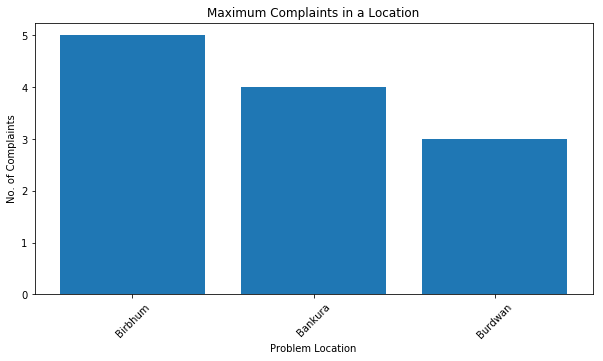

In [16]:
plt.figure(figsize=(10,5))
y=feedback['Location'].value_counts()
yd=feedback['Location'].unique()
p=feedback['Location'].nunique()
d=np.linspace(1,p,p)
plt.bar(d,y,align='center')
plt.xticks(d,yd,rotation=45)
plt.xlabel('Problem Location')
plt.ylabel('No. of Complaints')
plt.title('Maximum Complaints in a Location')
plt.rcParams.update({'font.size': 10})
plt.show()

In [17]:
feedloc = feedback['Location'] == "Birbhum"

### Going in depth finding out which zone major problems are happening

In [18]:
feedback[feedloc].Zone.value_counts()

Zone 1    5
Name: Zone, dtype: int64

In [19]:
feedback[feedloc].Problem.value_counts()

Teachers      4
Classrooms    1
Name: Problem, dtype: int64

In [20]:
feedloc = feedback['Location'] == "Bankura"

In [21]:
feedback[feedloc].Zone.value_counts()

Zone 3    2
Zone 2    1
Zone 1    1
Name: Zone, dtype: int64

In [22]:
feedback[feedloc].Problem.value_counts()

Classrooms    2
Washrooms     1
Teachers      1
Name: Problem, dtype: int64

In [23]:
feedloc = feedback['Location'] == "Burdwan"

In [24]:
feedback[feedloc].Zone.value_counts()

Zone 3    2
Zone 2    1
Name: Zone, dtype: int64

In [25]:
feedback[feedloc].Problem.value_counts()

Finance                 1
Books                   1
Electricity or Water    1
Name: Problem, dtype: int64

### That comes to the end of the data analyzing part. We find out the major problems that are hampering the education, whether the problem is getting solved or not. This is a more constructive way to find out the problems, to provide a solution, finding out the location where education is not happening properly. Analytics does it in a better way which helps us work in a more efficient way, in a precise manner and helps in solving problems and keeping the flow steady.

--------------------------------------------------------------------------------------------------------------------------------

## Analyzing Teachers data to find out the best suitable teachers

### Importing dataset

In [26]:
teachers=pd.read_csv("teachers.csv")

In [27]:
teachers.head()

,Name,email,phone,subject,education,location,hours
0,Debadri Dutta,debadridtt@gmail.com,9163502631,Maths & Sciences,Bachelors,Birbhum,5
1,Barnik Bhattacharya,barnik.ohm@gmail.com,8240518774,English,Bachelors,Bankura,5
2,Shatyoki Bhattacharya,shatyoki@gmail.com,7205740621,Maths & Sciences,Bachelors,Birbhum,5
3,Anish Chattopadhyay,anishc.234@gmail.com,8961525762,Maths & Sciences,Bachelors,Bankura,5
4,Gautam Dutta,gautam.primesinger@gmail.com,9831110434,Maths & Sciences,Masters,Hughli,2


### Most demanding subject, teachers are looking forward to teach

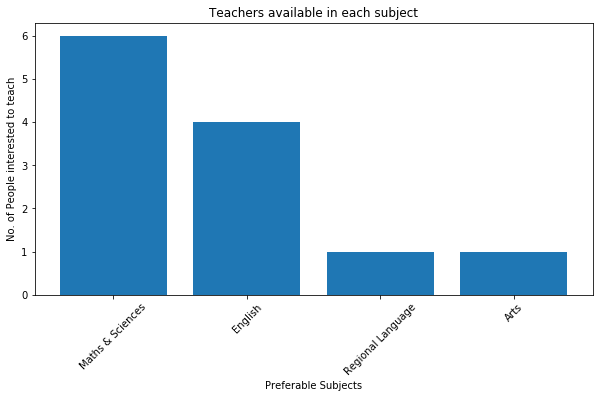

In [29]:
plt.figure(figsize=(10,5))
y=teachers['subject'].value_counts()
yd=teachers['subject'].unique()
p=teachers['subject'].nunique()
d=np.linspace(1,p,p)
plt.bar(d,y,align='center')
plt.xticks(d,yd,rotation=45)
plt.xlabel('Preferable Subjects')
plt.ylabel('No. of People interested to teach')
plt.title('Teachers available in each subject')
plt.rcParams.update({'font.size': 10})
plt.show()

### Most preferred location by teachers

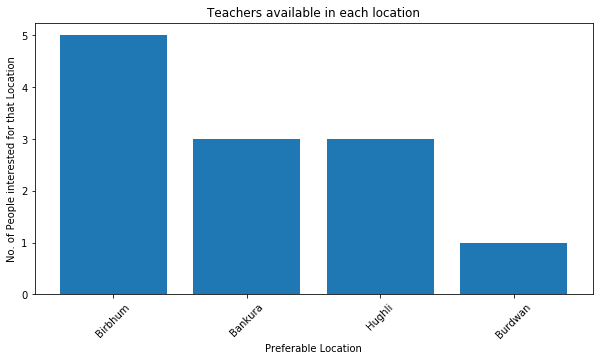

In [30]:
plt.figure(figsize=(10,5))
y=teachers['location'].value_counts()
yd=teachers['location'].unique()
p=teachers['location'].nunique()
d=np.linspace(1,p,p)
plt.bar(d,y,align='center')
plt.xticks(d,yd,rotation=45)
plt.xlabel('Preferable Location')
plt.ylabel('No. of People interested for that Location')
plt.title('Teachers available in each location')
plt.rcParams.update({'font.size': 10})
plt.show()

### Choosing best teachers based on their educational qualification

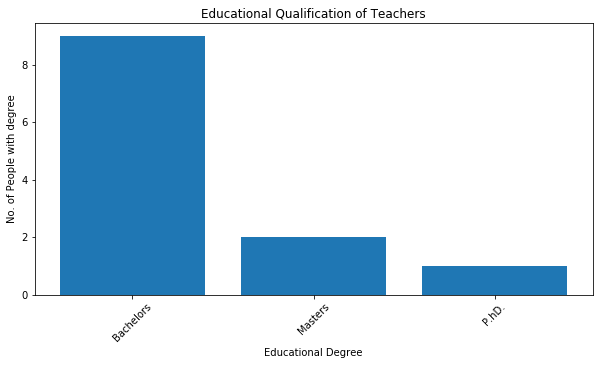

In [31]:
plt.figure(figsize=(10,5))
y=teachers['education'].value_counts()
yd=teachers['education'].unique()
p=teachers['education'].nunique()
d=np.linspace(1,p,p)
plt.bar(d,y,align='center')
plt.xticks(d,yd,rotation=45)
plt.xlabel('Educational Degree')
plt.ylabel('No. of People with degree')
plt.title('Educational Qualification of Teachers')
plt.rcParams.update({'font.size': 10})
plt.show()

### Time each teacher can devote so that routine can be set accordingly

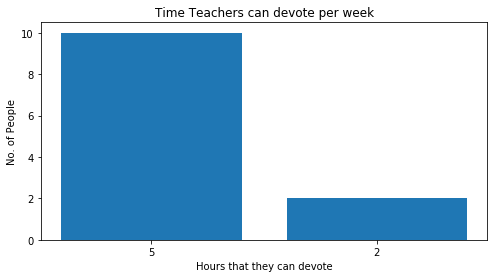

In [34]:
plt.figure(figsize=(8,4))
y=teachers['hours'].value_counts()
yd=teachers['hours'].unique()
p=teachers['hours'].nunique()
d=np.linspace(1,p,p)
plt.bar(d,y,align='center')
plt.xticks(d,yd)
plt.xlabel('Hours that they can devote')
plt.ylabel('No. of People')
plt.title('Time Teachers can devote per week')
plt.rcParams.update({'font.size': 12})
plt.show()

In [36]:
print("Hours each teacher can devote per week on an avg.:",teachers['hours'].mean())

Hours each teacher can devote per week on an avg. 4.5


### So by analyzing the data we find out the best and the most suitable teachers, we can make the study routine accordingly so that the studyflow is spontaneous and flawless, and since problems related to teachers are maximum, this is a good way to solve the problem

# Thank You